In [33]:
from __future__ import print_function
import numpy as np
import pandas as pd

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.cross_validation import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
filename = 'phishing_data.csv'
df = pd.read_csv(filename)
df.shape

(11055, 32)

In [35]:
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=42)

In [18]:
pca = PCA(n_components=2)
pca.fit(X_train)
pcafeatures_train = pca.transform(X_train)
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','b'])
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

In [ ]:
plot_PCA_2D(pcafeatures_train, target=y_train, target_names=df.iloc[:,-1])

In [ ]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
f1_score(y_test,y_pred, average = 'micro')

In [ ]:
f1_score(y_test,y_pred, average = 'macro')

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
conf = confusion_matrix(y_test,y_pred)
recall = conf[0, 0] / (conf[0, 0] + conf[0, 1])
recall

In [ ]:
precision = conf[0, 0] / (conf[0, 0] + conf[1, 0])
precision

In [ ]:
#RBF

In [ ]:
# fit rbf model
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)
model_svm2.fit(X_train, y_train)
y_pred2 = model_svm2.predict(X_test)
accuracy_score(y_test,y_pred2)

In [ ]:
confusion_matrix(y_test,y_pred2)

In [ ]:
conf = confusion_matrix(y_test,y_pred2)
recall = conf[0, 0] / (conf[0, 0] + conf[0, 1])
recall

In [ ]:
precision = conf[0, 0] / (conf[0, 0] + conf[1, 0])
precision

In [39]:
from sklearn import cross_validation
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=1000)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
    print("TPR = ", TP/(TP+FN))
    TPR = TP/(TP+FN)
# Specificity or true negative rate
    print("TNR = ", TN/(TN+FP))
    TNR = TN/(TN+FP)
# Precision or positive predictive value
    print("PPV = ", TP/(TP+FP))
# Negative predictive value
    print("NPV = ", TN/(TN+FN))
# Fall out or false positive rate
    print("FPR = ", FP/(FP+TN))
    FPR = FP/(FP+TN)
# False negative rate
    print("FNR = ", FN/(TP+FN))
    FNR = FN/(TP+FN)
# False discovery rate
    print("FDR = ", FP/(TP+FP))

# Overall accuracy
    print("ACC = ", (TP+TN)/(TP+FP+FN+TN))
    
    print("\n")
    print("Profit = ", TNR*60 + TPR*300 + FNR*(-3000) + FPR*-60)
    
    
    
    plt.figure()
    plot_confusion_matrix(cm)

[[1355  150]
 [ 103 1709]]
TPR =  0.929355281207
TNR =  0.919311457773
PPV =  0.900332225914
NPV =  0.943156732892
FPR =  0.080688542227
FNR =  0.0706447187929
FDR =  0.0996677740864
ACC =  0.923726258667


Profit =  117.189802916


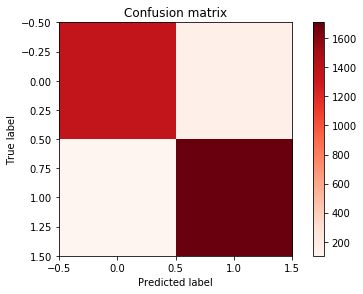

In [40]:
train_score(model_svm,X,y)